In [1]:
import os
import shutil
from shutil import copyfile
import random
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = "./data/PetImages/"

train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'testing')

# 训练集
train_dogs = os.path.join(base_dir, 'training/dogs')
train_cats = os.path.join(base_dir, 'training/cats')

# 测试集
test_dogs = os.path.join(base_dir, 'testing/dogs')
test_cats = os.path.join(base_dir, 'testing/cats')

In [3]:
model = tf.keras.models.Sequential([
    # 如果训练慢，可以数据设置的更小一些
    # 得到filter32个特征图，卷积核3*3，默认激活层直接加relu，input_data输入大小
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    # 池化层一般都是2*2，基本不改
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # 为全连接层做准备
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    # 二分类digmoid就够了，输出0-1之间的概率值
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
model.summary()
# 62 = (64 - 3) / 1 + 1, 32是输出个数， 896=3*3卷积核*3通道*32个卷积核+32即b值
# 池化层没权重参数，h，w变一半，个数不变
# 全连接层参数大，更容易过拟合

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy']
            )

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # 文件夹路径
    target_size=(64, 64), # 指定resize层的大小
    batch_size=20,
    # 如果one_hot就是categorical，二分类用binary就可以
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, # 文件夹路径
    target_size=(64, 64), # 指定resize层的大小
    batch_size=20,
    # 如果one_hot就是categorical，二分类用binary就可以
    class_mode='binary'
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=50,
    validation_data=test_generator,
    validation_steps=100,
    verbose=2
)

Epoch 1/50
200/200 - 22s - loss: 0.6861 - accuracy: 0.5495 - val_loss: 0.6749 - val_accuracy: 0.5555
Epoch 2/50
200/200 - 23s - loss: 0.6656 - accuracy: 0.5878 - val_loss: 0.6312 - val_accuracy: 0.6535
Epoch 3/50
200/200 - 23s - loss: 0.6556 - accuracy: 0.6040 - val_loss: 0.6188 - val_accuracy: 0.6640
Epoch 4/50
200/200 - 23s - loss: 0.6455 - accuracy: 0.6233 - val_loss: 0.6194 - val_accuracy: 0.6695
Epoch 5/50
200/200 - 23s - loss: 0.6361 - accuracy: 0.6346 - val_loss: 0.6017 - val_accuracy: 0.6790
Epoch 6/50
200/200 - 23s - loss: 0.6151 - accuracy: 0.6595 - val_loss: 0.5793 - val_accuracy: 0.7005
Epoch 7/50
200/200 - 24s - loss: 0.6136 - accuracy: 0.6622 - val_loss: 0.6114 - val_accuracy: 0.6670
Epoch 8/50
200/200 - 24s - loss: 0.6116 - accuracy: 0.6528 - val_loss: 0.5682 - val_accuracy: 0.7125
Epoch 9/50
200/200 - 24s - loss: 0.6039 - accuracy: 0.6752 - val_loss: 0.6021 - val_accuracy: 0.6830
Epoch 10/50
200/200 - 24s - loss: 0.5846 - accuracy: 0.6865 - val_loss: 0.5782 - val_accura

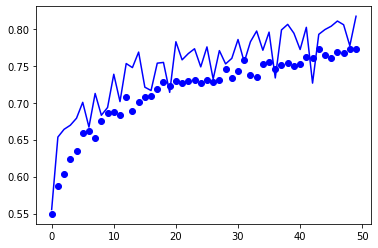

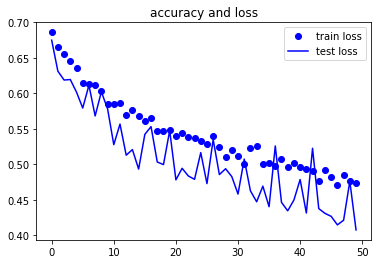

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, "bo", label='train accuracy')
plt.plot(epochs, val_acc, 'b', label='test accuracy')

plt.figure()
plt.plot(epochs, loss, "bo", label='train loss')
plt.plot(epochs, val_loss, 'b', label='test loss')

plt.title('accuracy and loss')
plt.legend()
plt.show()

In [10]:
model2 = tf.keras.models.Sequential([
    # 如果训练慢，可以数据设置的更小一些
    # 得到filter32个特征图，卷积核3*3，默认激活层直接加relu，input_data输入大小
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    # 池化层一般都是2*2，基本不改
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    # 为全连接层做准备
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # 二分类digmoid就够了，输出0-1之间的概率值
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy']
            )

In [13]:
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=50,
    validation_data=test_generator,
    validation_steps=100,
    verbose=2
)

Epoch 1/50
200/200 - 73s - loss: 0.6934 - accuracy: 0.5120 - val_loss: 0.6850 - val_accuracy: 0.5645
Epoch 2/50
200/200 - 60s - loss: 0.6852 - accuracy: 0.5625 - val_loss: 0.6766 - val_accuracy: 0.5380
Epoch 3/50
200/200 - 66s - loss: 0.6629 - accuracy: 0.6037 - val_loss: 0.6929 - val_accuracy: 0.5610
Epoch 4/50
200/200 - 64s - loss: 0.6543 - accuracy: 0.6196 - val_loss: 0.6658 - val_accuracy: 0.5890
Epoch 5/50
200/200 - 63s - loss: 0.6472 - accuracy: 0.6230 - val_loss: 0.6630 - val_accuracy: 0.6055
Epoch 6/50
200/200 - 62s - loss: 0.6205 - accuracy: 0.6467 - val_loss: 0.6104 - val_accuracy: 0.6715
Epoch 7/50
200/200 - 64s - loss: 0.6294 - accuracy: 0.6385 - val_loss: 0.6040 - val_accuracy: 0.6710
Epoch 8/50
200/200 - 73s - loss: 0.6164 - accuracy: 0.6565 - val_loss: 0.6262 - val_accuracy: 0.6605
Epoch 9/50
200/200 - 64s - loss: 0.6119 - accuracy: 0.6678 - val_loss: 0.5655 - val_accuracy: 0.7255
Epoch 10/50
200/200 - 59s - loss: 0.6029 - accuracy: 0.6693 - val_loss: 0.5580 - val_accura

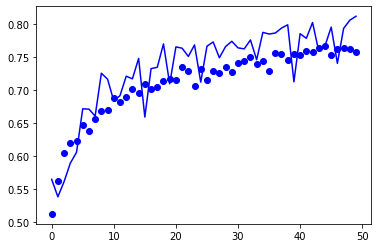

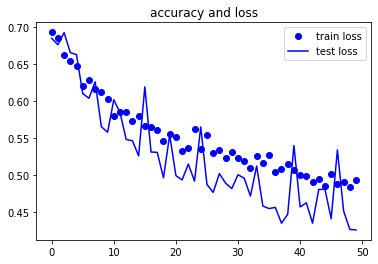

In [14]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, "bo", label='train accuracy')
plt.plot(epochs, val_acc, 'b', label='test accuracy')

plt.figure()
plt.plot(epochs, loss, "bo", label='train loss')
plt.plot(epochs, val_loss, 'b', label='test loss')

plt.title('accuracy and loss')
plt.legend()
plt.show()